# **Actividades culturales en el 2019**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;En distintos establecimientos, ya sea públicos o privados se han llevado a cabo
durante todo el año 2019 distintas actividades culturales en el territorio de la Ciudad Autónoma de Buenos Aires.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Luego de haber hecho una limpieza de los datos para facilitar su estudio, el objetivo del siguiente documento
es responder a las siguientes preguntas:
<ul>
<li>¿Cuáles son los barrios de la comuna 13 que incluyen actividades culturales?</li>
<li>¿Qué establecimientos suspenden los eventos en caso de lluvia?</li>
<li>¿En qué horario es más habitual que haya un evento? </li>
<li>¿A qué tipo de público suelen ser mas dirigidas las actividades?</li>
<li>¿Cómo es la distribución de las actividades culturales en el Centro Cultural Recoleta?</li>

</ul>

In [37]:
from IPython.display import  Markdown as md
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1

In [38]:
def revisarLargoHora(valor):
    valor = str(valor)
    nuevoHorario = valor
    if(valor!="PERIODO" and len(valor)==8):
        nuevoHorario = valor[0:5]
    return nuevoHorario

def sumarCantidadEventosAcordeHorarios(horariosSinPuntos):
    periodo=0
    menorDieciseis = 0
    mayorDieciseis = 0
    dieciseis = 0
    for i in range(len(horariosSinPuntos)):
        if(horariosSinPuntos[i]=="PERIODO"):
          periodo+=1
        else:
            if(horariosSinPuntos[i]=="1600"):
                dieciseis+=1
            elif(horariosSinPuntos[i]>"1600"):
                mayorDieciseis+=1
            elif(horariosSinPuntos[i]<"1600"):
                menorDieciseis+=1
    return dieciseis,menorDieciseis,mayorDieciseis, periodo

def eliminarDoblepunto(valor):
  valor = str(valor)
  if(valor!="PERIODO"):
      for caracter in valor:
        if not caracter.isnumeric():
            valor = valor.replace(caracter,'')
  return valor

def eliminarEspacios():
    columnas = list(df1.columns)
    for i in range(len(columnas)):
        columnas[i] = columnas[i].replace(" ","")
    return columnas

def arreglarCalleAltura(valor):
  valor = str(valor)
  if(valor == "s/n" or valor=="nan"):
    valor = np.nan
  return valor

def arreglarDiaInicio(valor):
  valor = str(valor)
  if not valor.isnumeric():
      valor= np.nan
  return valor

def obtenerColumna(nombreColumna, df1):
  columna = df1[nombreColumna]
  valoresColumna= {}

  for indice, valor in columna.items():
    valoresColumna[indice] = valor

  return valoresColumna

def obtenerIndices(indicesValores, elementoACoincidir):
  indices = []
  for indice in indicesValores:
    if(indicesValores[indice]==elementoACoincidir):
      indices.append(indice)

  return indices

def obtenerValores(indices, indicesValores):
  valores = []
  for i in indices:
    valores.append(indicesValores[i])
  return valores

def cantidadApariciones(arrayEntero, arraySinRepeticiones):
  contador = 0
  cantidadVeces = []
  for i in range(len(arraySinRepeticiones)):
    for j in range(len(arrayEntero)):
      if(arrayEntero[j]==arraySinRepeticiones[i]):
        contador+=1
    cantidadVeces.append(contador)
    contador = 0
  return cantidadVeces

In [39]:
df1 = pd.read_csv("../data/actividades-culturales-2019.csv",sep=",", skipinitialspace=True,engine="python" )
df1.columns = eliminarEspacios()
df1['calle_altura'] = df1['calle_altura'].apply(arreglarCalleAltura)
df1['calle_altura'] = df1['calle_altura'].apply(arreglarCalleAltura)
df1["dia_inicio"] = df1["dia_inicio"].apply(arreglarDiaInicio)
df1 = df1.dropna()

In [40]:
#En qué barrios de la comuna 13 hay act culturales?
indiceValorComuna = obtenerColumna("comuna",df1)
indiceValorBarrio = obtenerColumna("barrio",df1)
indicesComuna = obtenerIndices(indiceValorComuna,"COMUNA 13")
barriosDeUnaComuna = obtenerValores(indicesComuna,indiceValorBarrio)
barriosDeUnaComunaSinRepeticiones = list(dict.fromkeys(barriosDeUnaComuna))
cantidadBarrio=cantidadApariciones(barriosDeUnaComuna, barriosDeUnaComunaSinRepeticiones)
x_values = np.array(barriosDeUnaComunaSinRepeticiones)
y_values = np.array(cantidadBarrio)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Respondiendo a la primer pregunta, la comuna 13 está conformada por los barrios de Núñez, Belgrano y Colegiales. Está ubicada en una de las zonas más altas
de la Ciudad, caracterizada por barrancas y lomadas que bajan en dirección al río.
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Hay una notable mayor presencia de eventos en Belgrano lo cual puede ser debido a la historia de este barrio residencial.
Su gran cantidad de casonas típicas del siglo XIX genera excelentes locaciones para distintas performances así como también el establecimiento
de museos o galerias.

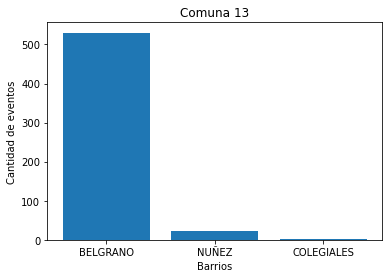

In [41]:
# gráfico cantidad de eventos en cada barrio de la comuna 13
plt1.bar(x_values,y_values)
plt1.title('Comuna 13')
plt1.xlabel('Barrios')
plt1.ylabel('Cantidad de eventos')
plt1.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;No todas las locaciones pueden garantizar un seguro de lluvia, es decir, que en caso de que llueva la propuesta cultural
pueda ser llevada a cabo de igual forma. Debido a esto, a continuacion se hace una enumeración de aquellos lugares en donde la realización del evento
esta sujeto a las condiciones meteorológicas:

In [42]:
#En donde se realizan los eventos que se cancelan por lluvia?
indiceValorSuspensionLluvia = obtenerColumna("se_suspende_por_lluvia",df1)
indiceValorEstablecimiento = obtenerColumna("establecimiento",df1)
indicesSuspension = obtenerIndices(indiceValorSuspensionLluvia,"SI")
establecimientos = obtenerValores(indicesSuspension,indiceValorEstablecimiento)
establecimientosSinRepeticiones = list(dict.fromkeys(establecimientos))
print(establecimientosSinRepeticiones)
lista = str(establecimientosSinRepeticiones)
sinCorchetes = lista.replace("[","")
sinCorchetes = sinCorchetes.replace("]","")
md(sinCorchetes)

['CENTRO CULTURAL RECOLETA', 'MUSEO DE ARTE ESPAÑOL ENRIQUE LARRETA', 'ANFITEATRO DEL PARQUE CENTENARIO', 'LAVADERO ARTESANAL MB', 'BALCÓN GUARDIA VIEJA', 'LA HUELLA ARTE EN MOVIMIENTO', 'HORNO A LEÑA AMBROSIO', 'EDIFICIO EN CONSTRUCCIÓN', 'CANAL DE LA CIUDAD', 'SUBTE B ESTACIÓN CARLOS GARDEL', 'AV. PASEO COLÓN Y CHILE', 'CENTRO CULTURAL SAN MARTÍN', 'LA BOCA', 'AREATEC DEL EDIFICIO CASSARÁ', 'CENTRO CULTURAL 25 DE MAYO', 'FUNDACIÓN CASSARÁ', 'IGLESIA SAN PEDRO TELMO', 'MUSEO HISTÓRICO DE BUENOS AIRES CORNELIO SAAVEDRA', 'CASA ROSADA', 'CASA DE LA CULTURA', 'IGLESIA MONTSERRAT', 'IGLESIA LA PIEDAD', 'MUSEO DE ARTE HISPANOAMERICANO ISAAC FERNÁNDEZ BLANCO', 'IGLESIA INMACULADA CONCEPCIÓN', 'MUSEO DE ARTE POPULAR JOSÉ HERNÁNDEZ', 'CASA FERNÁNDEZ BLANCO (PERTENCE AL MUSEO)', 'IGLESIA NÓRDICA', 'USINA DEL ARTE', 'BASÍLICA NUESTRA SEÑORA DE LA MERCED', 'CASA DEL VIRREY LINIERS', 'MUSEO HISTÓRICO CORNELIO DE SAAVEDRA', 'CONVENTO SANTO DOMINGO', 'HOSPITAL MUÑIZ', 'ESTACIÓN COGHLAN', 'ESPACIO P

'CENTRO CULTURAL RECOLETA', 'MUSEO DE ARTE ESPAÑOL ENRIQUE LARRETA', 'ANFITEATRO DEL PARQUE CENTENARIO', 'LAVADERO ARTESANAL MB', 'BALCÓN GUARDIA VIEJA', 'LA HUELLA ARTE EN MOVIMIENTO', 'HORNO A LEÑA AMBROSIO', 'EDIFICIO EN CONSTRUCCIÓN', 'CANAL DE LA CIUDAD', 'SUBTE B ESTACIÓN CARLOS GARDEL', 'AV. PASEO COLÓN Y CHILE', 'CENTRO CULTURAL SAN MARTÍN', 'LA BOCA', 'AREATEC DEL EDIFICIO CASSARÁ', 'CENTRO CULTURAL 25 DE MAYO', 'FUNDACIÓN CASSARÁ', 'IGLESIA SAN PEDRO TELMO', 'MUSEO HISTÓRICO DE BUENOS AIRES CORNELIO SAAVEDRA', 'CASA ROSADA', 'CASA DE LA CULTURA', 'IGLESIA MONTSERRAT', 'IGLESIA LA PIEDAD', 'MUSEO DE ARTE HISPANOAMERICANO ISAAC FERNÁNDEZ BLANCO', 'IGLESIA INMACULADA CONCEPCIÓN', 'MUSEO DE ARTE POPULAR JOSÉ HERNÁNDEZ', 'CASA FERNÁNDEZ BLANCO (PERTENCE AL MUSEO)', 'IGLESIA NÓRDICA', 'USINA DEL ARTE', 'BASÍLICA NUESTRA SEÑORA DE LA MERCED', 'CASA DEL VIRREY LINIERS', 'MUSEO HISTÓRICO CORNELIO DE SAAVEDRA', 'CONVENTO SANTO DOMINGO', 'HOSPITAL MUÑIZ', 'ESTACIÓN COGHLAN', 'ESPACIO PARA LA MEMORIA EX ATLÉTICO', 'EL IMPERIO DE LA PIZZA', 'YEITE CAFE', 'EL BANDERIN', 'IGLESIA SANTO DOMINGO', 'BIBLIOTECA MARIANO MORENO', 'CASAL DE CATALUNYA', 'BARTOLOMÉ MITRE1545', 'BAR EL TIEMPO', 'MUSEO DE LA CASA ROSADA', 'ASOCIACIÓN DE EMPLEADOS DE LA ADMINISTRACIÓN NACIONAL DE ADUANAS', 'AV. DE MAYO 575', 'CABILDO', 'AV. DON PEDRO DE MENDOZA 1600', 'PASAJE ROVERANO', 'AVELLANEDA', 'BARRIOS DE RECOLETA Y RETIRO', 'BUTTELER , ZELARRAYÀN Y SENILLOSA', 'EDIFICIO MIGUEL BENCICH', 'BARRIOS DE MONTSERRAT Y CONSTITUCIÓN', 'BASÍLICA SANTA ROSA DE LIMA', 'BARRIO DE  PARQUE CHACABUCO', 'BARRIO RECOLETA', 'BARRIO VILLA DEVOTO', 'PLAZA BARTOLOMÉ MITRE', 'AV ASAMBLEA AL 1001', 'IRIARTE 2795', 'AV  ALMIRANTE BROWN', 'BARRIO RETIRO', 'CLUB VILLA SAHORES', 'ADOLFO ALSINA', 'ESPACIO CULTURAL MARCÓ DEL PONT', 'BAR EL COLONIAL', 'FLORIDA 99', 'BARRIO SAN NICOLÁS', 'JARDÍN DE INFANTES INTEGRAL 4 D.E. 10', 'JARDÍN INICIAL 1 DE 13', 'MUSEO DEL CINE PABLO DUCRÓS HICKEN', 'ESCUELA PRIMARIA COMÚN 24 DE 8', 'TILCARA Y PIO MUJICA', 'PASAJE 5 DE JULIO', 'TORRE MONUMENTAL', 'TEATRO GRAN RIVADAVIA', 'AV. PASEO COLÓN E HIPÓLITO YRIGOYEN', 'ACADEMIA NACIONAL DEL TANGO', 'BARRIO SALDÍAS', 'EX CASA DE LUCA PRODAN'

In [43]:
#Las actividades suelen ser a partir de las 16h o antes?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Con respecto a los horarios, más de la mitad de los eventos
se dan luego de las 16hs. Esto puede relacionarse que como para esa hora es más probable que los niños ya hayan finalizado
su horario escolar y algunos adultos ya habrán terminado de trabajar podrá haber un mayor nivel de asistencia.
&nbsp;&nbsp;&nbsp;&nbsp;Cabe destacar que el poco porcentaje de las actividades que ocurren durante todo el día se debe a que terminan sin atraer tanta gente. Genera más expectativa que
ocurran a un determinado horario a que cada ciudadano elija cuando ir.

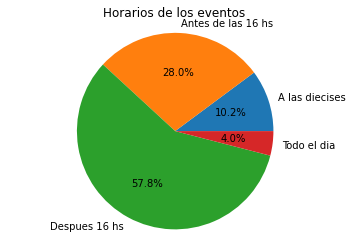

In [44]:
horariosSinPuntos = []
df1["hora_inicio"]=df1["hora_inicio"].apply(revisarLargoHora)
for indice, valor in df1["hora_inicio"].items():
    horariosSinPuntos.append(eliminarDoblepunto(valor))
dieciseis,antes16,despues16,periodo = sumarCantidadEventosAcordeHorarios(horariosSinPuntos)

horas = ["A las diecises", "Antes de las 16 hs", "Despues 16 hs", "Todo el dia"]
cantidadEventos = [dieciseis,antes16,despues16,periodo]
x_values = np.array(horas)
y_values = np.array(cantidadEventos)
# gráfico cantidad de eventos en cada barrio de la comuna 13
plt1.pie(y_values, labels=x_values, autopct='%1.1f%%')
plt1.axis("equal")
plt1.title('Horarios de los eventos')

plt1.show()





&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;La mayoria de las actividad apuntan a un público general ya que, así como se mencionó anteriormente con el tema dle horario, es más factible que
la gente vaya. Muchas veces, si hay algún evento restringido a un grupo etario, las personas con hijos deciden no ir porque no quieren dejar a los niños solos perdiéndose así
una gran fuente de ingreso para los organizadores.

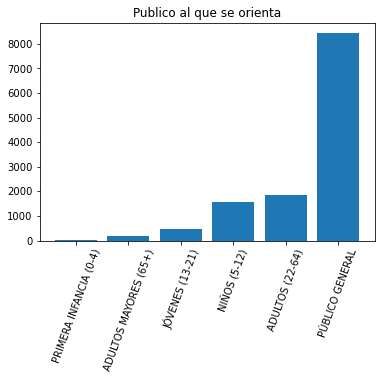

In [45]:
# Cuántas actividades hay orientada a cada tipo de público?
x_values = df1["publico_objetivo"].unique()
y_values = df1["publico_objetivo"].value_counts().tolist()
y_values.reverse()
x_values= np.flip(x_values)
# gráfico modalidad elegida

plt1.xticks(rotation=70)
plt1.bar(x_values,y_values)
plt1.title('Publico al que se orienta')
plt1.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; El Centro Cultural Recoleta es un espacio que está constantemente incorporando nuevas cosas y
con la intención de que participen adolescentes y jóvenes en sus propuestas. Apuesta a la convivencia en la diversidad e impulsa los movimientos artísticos del país y del mundo
desde hace más de tres décadas.
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Hay salas permanentes dedicadas a los adolescentes, al hip-hop, al dibujo, una zona de estudio, un espacio de ocio y recreación, un bar y una tienda de objetos
de diseño argentino contemporáneo, además de la Terraza, el Cine, el Laboratorio musical, el Centro de investigación, la Residencia para artistas, la Capilla y las salas de exhibición para artes visuales.       
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Libertad, participación y convivencia son los valores que determinan el cruce de actividades: artes visuales, música, danza, teatro, literatura y cine conviven con hip hop,
cosplayers, booktubers, instagramers, gamers y todas las nuevas escenas culturales jóvenes que están vivas en la ciudad.
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; De está forma estuvieron distribuidas durante el año 2019:



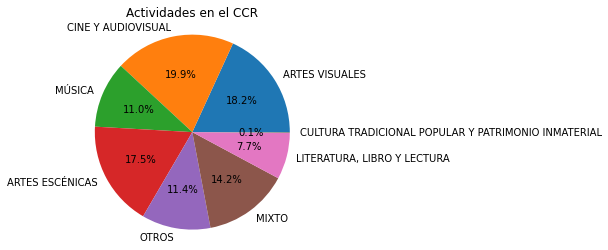

In [46]:
#Variedad de actividades en el CCR
#Qué disciplinas artísticas se llevan a cabo en el CCR?
indiceValorDisciplinas = obtenerColumna("disciplina_artistica",df1)
indiceValorEstablecimiento = obtenerColumna("establecimiento",df1)
indicesDisciplinas = obtenerIndices(indiceValorEstablecimiento,"CENTRO CULTURAL RECOLETA")
disciplinas = obtenerValores(indicesDisciplinas, indiceValorDisciplinas)
disciplinasSinRepeticiones = list(dict.fromkeys(disciplinas))
cantidadPorDisciplina=cantidadApariciones(disciplinas, disciplinasSinRepeticiones)
x_values = np.array(disciplinasSinRepeticiones)
y_values = np.array(cantidadPorDisciplina)
# gráfico cantidad de eventos en cada barrio de la comuna 13
# plt1.bar(x_values,y_values)
plt1.pie(y_values, labels=x_values, autopct='%1.1f%%')
plt1.axis("equal")
plt1.title('Actividades en el CCR')
plt1.show()


